# 1. Import thư viện

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfTransformer

# 2. Collecting data

## 2.1 What subject is your data about? What is the source of your data?

**Subject:** Nói về các cuốn sách được đọc nhiều trong năm 2021<br>
**Source:** https://www.kaggle.com/datasets/shashwatwork/best-book-ever-data-for-2021/data

## 2.2 Do authors of this data allow you to use like this? You can check the data license

- **Chia sẻ** - sao chép và phân phối lại dataset ở bất kỳ phương tiện hoặc định dạng nào
- **Thích ứng** - phối lại, biến đổi và xây dựng dựa trên dataset

## 2.3 How did authors collect data?

Dataset đã được thu thập trong khung Prac1 của chủ đề Tipology and Data Life Cycle của Bằng Thạc sĩ Khoa học dữ liệu của Đại học Oberta de Catalunya (UOC).

# 3. Exploring data

In [5]:
df = pd.read_csv("books_1.Best_Books_Ever.csv")
df.head(10)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
5,19063.The_Book_Thief,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",...,09/01/05,['National Jewish Book Award for Children’s an...,1834276,"['1048230', '524674', '186297', '48864', '26211']",96.0,"['Molching (Germany)', 'Germany']",https://i.gr-assets.com/images/S/compressed.ph...,1372809,14168,3.8
6,170448.Animal_Farm,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,Librarian's note: There is an Alternate Cover ...,English,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",...,08/17/45,"['Prometheus Hall of Fame Award (2011)', 'Retr...",2740713,"['986764', '958699', '545475', '165093', '84682']",91.0,"['England', 'United Kingdom']",https://i.gr-assets.com/images/S/compressed.ph...,1276599,13264,4.42
7,11127.The_Chronicles_of_Narnia,The Chronicles of Narnia,The Chronicles of Narnia (Publication Order) #1–7,"C.S. Lewis, Pauline Baynes (Illustrator)",4.26,"Journeys to the end of the world, fantastic cr...",English,9999999999999,"['Fantasy', 'Classics', 'Fiction', 'Youn

## 3.1 How many rows and how many columns?

In [6]:
n_rows = df.shape[0]
n_cols = df.shape[1]
print("Number of rows: ",n_rows)
print("Number of columns: ",n_cols)

Number of rows:  52478
Number of columns:  25


## 3.2 What is the meaning of each row?

Mỗi dòng trong dataset sẽ đại diện cho một cuốn sách, phân biệt bằng thuộc tính "bookId", chứa những thuộc tính bao gồm thông tin của cuốn sách đó bao gồm tên sách, tác giả, thể loại,...

## 3.3 Are there duplicated rows?

In [7]:
def check_duplicated(df):
    if (sum(df.duplicated()) > 0):
        print("There are duplicated rows, number of duplicated rows: ",sum(df.duplicated()))
    else:
        print("There is no duplicated row.")

check_duplicated(df)

There are duplicated rows, number of duplicated rows:  50


In [8]:
#remove duplicated rows
# df = df.drop(["price"],axis=1) 
df = df.drop_duplicates()
check_duplicated(df)

There is no duplicated row.


## 3.4 What is the meaning of each column?

- bookId: Định danh của sách trên goodreads.com
- title: Tiêu đề sách
- series: Tên thứ tự sách trong một chuỗi loạt sách
- author: Tác giả của sách
- rating: Điểm đánh giá toàn cầu trên Goodreads
- description: Mô tả về sách
- language: Ngôn ngữ của sách
- isbn: Số ISBN của sách
- genres: Thể loại của sách
- characters: Nhân vật chính trong sách
- bookFormat: Loại bìa sách
- edition: Loại bản sách (ví dụ: Bản kỷ niệm)
- pages: Số trang của sách
- publisher: Nhà xuất bản
- publishDate: Ngày xuất bản
- firstPublishDate: Ngày xuất bản của bản đầu tiên
- awards: Danh sách các giải thưởng
- numRatings: Tổng số lượt đánh giá
- ratingsByStars: Số lượt đánh giá từng theo sao
- likedPercent: Phần trăm số lượt đánh giá từ 2 sao trở lên (như trên Goodreads)
- setting: Bối cảnh của câu chuyện
- coverImg: Đường link đến hình ảnh bìa sách
- bbeScore: Điểm trong danh sách "Best Books Ever"
- bbeVotes: Số phiếu bầu trong danh sách "Best Books Ever"
- price: Giá sách (trích xuất từ Iberlibro)


In [9]:
# Xử lí edition, bookFormat
# df['bookFormat'].value_counts()
# df['edition'].value_counts()[:30]

## 3.5 What is the current data type of each column? Are there columns having inappropriate data types?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52428 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52428 non-null  object 
 1   title             52428 non-null  object 
 2   series            23445 non-null  object 
 3   author            52428 non-null  object 
 4   rating            52428 non-null  float64
 5   description       51092 non-null  object 
 6   language          48627 non-null  object 
 7   isbn              52428 non-null  object 
 8   genres            52428 non-null  object 
 9   characters        52428 non-null  object 
 10  bookFormat        50955 non-null  object 
 11  edition           4949 non-null   object 
 12  pages             50085 non-null  object 
 13  publisher         48736 non-null  object 
 14  publishDate       51549 non-null  object 
 15  firstPublishDate  31125 non-null  object 
 16  awards            52428 non-null  object 
 17

Có, các cột bị sai kiểu dữ liệu chẳng hạn như: 
- pages: object thay vì numeric.
- publishDate: object thay vì datetime object.
- firstPublishDate: object thay vì datetime object.
- ratingsByStars: là dạng string list của số lượt đánh giá theo từng sao, ta sẽ chia thành 5 cột.
- setting: dạng string list chuyển sang list.
- genres: dạng string list chuyển sang list.
- author: dạng string (chuỗi các tác giả) sang list các tác giả.
- characters: dạng string list chuyển sang list.

In [11]:
#Fix data type
df["pages"] = pd.to_numeric(df["pages"], errors='coerce')

In [12]:
date_formats = [
    '%m/%d/%y', '%B %dth %Y', '%B %dst %Y', '%B %dnd %Y', '%B %drd %Y', 'Y', '%B %Y', "%b-%y"
]
def convert_to_date(date_str):
    for fmt in date_formats:
        try:
            new_date = pd.to_datetime(date_str, format=fmt)
            if new_date.year > 2023:
                return new_date.replace(year=new_date.year - 100)
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass
    return pd.NaT

df['publishDate'] = df['publishDate'].apply(convert_to_date)
df['firstPublishDate'] = df['firstPublishDate'].apply(convert_to_date)

In [13]:
df['publishDate']

0       2008-09-14
1       2004-09-28
2       2006-05-23
3       2000-10-10
4       2006-09-06
           ...    
52473   2011-05-28
52474   2011-08-05
52475   2011-03-18
52476   2011-09-01
52477   2011-05-08
Name: publishDate, Length: 52428, dtype: datetime64[ns]

In [14]:
df['awards']

0        ['Locus Award Nominee for Best Young Adult Boo...
1        ['Bram Stoker Award for Works for Young Reader...
2        ['Pulitzer Prize for Fiction (1961)', 'Audie A...
3                                                       []
4        ['Georgia Peach Book Award (2007)', 'Buxtehude...
                               ...                        
52473                                                   []
52474                                                   []
52475              ["Readers' Favorite Book Award (2011)"]
52476                                                   []
52477                                                   []
Name: awards, Length: 52428, dtype: object

In [15]:
def convert_to_list(x):
    return x[1:-1].replace("'","").split(', ')

In [16]:
df['awards'] = df['awards'].apply(lambda x: convert_to_list(x))
df['awards'] = df['awards'].apply(lambda x: [y.replace('"',"") for y in x])

In [17]:
df['ratingsByStars'] = df['ratingsByStars'].apply(lambda x: convert_to_list(x))
df['ratingsByStars'] = df['ratingsByStars'].apply(lambda x : [int(y) for y in x if y.isdigit()])

In [18]:
df['setting'] = df['setting'].apply(lambda x: convert_to_list(x))

In [19]:
df['genres'] = df['genres'].apply(lambda x: convert_to_list(x))

In [21]:
df['characters'] = df['characters'].apply(lambda x: convert_to_list(x))

In [22]:
df['ratingsByStars'][0]

[3444695, 1921313, 745221, 171994, 93557]

In [23]:
df[['5_star', '4_star', '3_star', '2_star', '1_star']] = df['ratingsByStars'].apply(pd.Series)

In [24]:
df['1_star']

0         93557.0
1         14526.0
2         80794.0
3         76770.0
4        548674.0
           ...   
52473        11.0
52474         0.0
52475       390.0
52476         5.0
52477         8.0
Name: 1_star, Length: 52428, dtype: float64

In [25]:
df = df.drop(['ratingsByStars'],axis=1)

In [26]:
def remove_parentheses(entry):
    '''
    Remove role in author strings
    '''
    return re.sub(r'\([^)]*\)', '', entry)
df['author'] = df['author'].apply(lambda x: remove_parentheses(x.replace(", more…","")).split(', '))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52428 entries, 0 to 52477
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   bookId            52428 non-null  object        
 1   title             52428 non-null  object        
 2   series            23445 non-null  object        
 3   author            52428 non-null  object        
 4   rating            52428 non-null  float64       
 5   description       51092 non-null  object        
 6   language          48627 non-null  object        
 7   isbn              52428 non-null  object        
 8   genres            52428 non-null  object        
 9   characters        52428 non-null  object        
 10  bookFormat        50955 non-null  object        
 11  edition           4949 non-null   object        
 12  pages             50062 non-null  float64       
 13  publisher         48736 non-null  object        
 14  publishDate       45605 non

**Cột "pages" có giá trị float thay vì int vì có cột này chứa missing value, pandas sử dụng numpy để xử lý nên numpy hiểu các missing value (NaN) dạng float.**

In [28]:
df['genres']

0        [Young Adult, Fiction, Dystopia, Fantasy, Scie...
1        [Fantasy, Young Adult, Fiction, Magic, Childre...
2        [Classics, Fiction, Historical Fiction, School...
3        [Classics, Fiction, Romance, Historical Fictio...
4        [Young Adult, Fantasy, Romance, Vampires, Fict...
                               ...                        
52473    [Vampires, Paranormal, Young Adult, Romance, F...
52474                               [Mystery, Young Adult]
52475    [Fantasy, Young Adult, Paranormal, Angels, Rom...
52476    [Fiction, Mystery, Historical Fiction, Adventu...
52477    [Lds Fiction, Historical Fiction, Young Adult,...
Name: genres, Length: 52428, dtype: object

In [29]:
df['setting']

0        [District 12, Panem, Capitol, Panem, Panem (Un...
1        [Hogwarts School of Witchcraft and Wizardry (U...
2                       [Maycomb, Alabama (United States)]
3        [United Kingdom, Derbyshire, England (United K...
4        [Forks, Washington (United States), Phoenix, A...
                               ...                        
52473                                                   []
52474                                                   []
52475                                                   []
52476                                                   []
52477                                                   []
Name: setting, Length: 52428, dtype: object

**Cột "pages" có giá trị float thay vì int vì có cột này chứa missing value, pandas sử dụng numpy để xử lý nên numpy hiểu các missing value (NaN) dạng float.**

## 3.6 With each numerical column, how are values distributed?

In [30]:
df.describe()

,rating,pages,publishDate,firstPublishDate,numRatings,likedPercent,bbeScore,bbeVotes,5_star,4_star,3_star,2_star,1_star
count,52428.000000,50062.000000,45605,30090,5.242800e+04,51807.000000,5.242800e+04,52428.000000,5.100600e+04,5.100600e+04,5.100600e+04,51006.000000,51006.000000
mean,4.021865,328.706664,2007-04-03 11:59:53.369148416,1994-08-10 13:23:33.439681024,1.789260e+04,92.231938,1.985832e+03,22.549535,7.490740e+03,6.147517e+03,3.411688e+03,928.435910,412.779987
min,0.000000,0.000000,1820-10-01 00:00:00,1722-03-01 00:00:00,0.000000e+00,0.000000,0.000000e+00,-4.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,3.820000,210.000000,2003-05-06 00:00:00,1985-11-06 00:00:00,3.410000e+02,90.000000,8.400000e+01,1.000000,1.460000e+02,1.340000e+02,7.800000e+01,19.000000,7.000000
50%,4.030000,304.000000,2009-04-24 00:00:00,2002-01-01 00:00:00,2.309500e+03,94.000000,9.700000e+01,1.000000,8.840000e+02,8.340000e+02,4.900000e+02,117.000000,39.000000
75%,4.230000,392.000000,2013-08-01 00:00:00,2010-01-01 00:00:00,9.389000e+03,96.000000,1.870000e+02,2.000000,3.567750e+03,3.375000e+03,1.957750e+03,475.000000,163.000000
max,5.000000,14777.000000,2020-10-27 00:00:00,2023-12-23 00:00:00,7.048471e+06,100.000000,2.993816e+06,30516.000000,4.578137e+06,1.921313e+06,1.008686e+06,542017.000000,548674.000000
std,0.367116,252.264913,NaN,NaN,1.039932e+05,5.988683,3.516985e+04,369.333934,5.144225e+04,3.206654e+04,1.720328e+04,5659.912855,3765.856356


In [31]:
numerical_df = df.select_dtypes(include=np.number)
numerical_df

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,5_star,4_star,3_star,2_star,1_star
0,4.33,374.0,6376780,96.0,2993816,30516,3444695.0,1921313.0,745221.0,171994.0,93557.0
1,4.50,870.0,2507623,98.0,2632233,26923,1593642.0,637516.0,222366.0,39573.0,14526.0
2,4.28,324.0,4501075,95.0,2269402,23328,2363896.0,1333153.0,573280.0,149952.0,80794.0
3,4.26,279.0,2998241,94.0,1983116,20452,1617567.0,816659.0,373311.0,113934.0,76770.0
4,3.60,501.0,4964519,78.0,1459448,14874,1751460.0,1113682.0,1008686.0,542017.0,548674.0
...,...,...,...,...,...,...,...,...,...,...,...
52473,4.00,0.0,871,94.0,0,1,311.0,310.0,197.0,42.0,11.0
52474,4.19,190.0,37,95.0,0,1,16.0,14.0,5.0,2.0,0.0
52475,3.70,280.0,6674,84.0,0,1,2109.0,1868.0,1660.0,647.0,390.0
52476,3.85,507.0,238,90.0,0,1,77.0,78.0,59.0,19.0,5.0


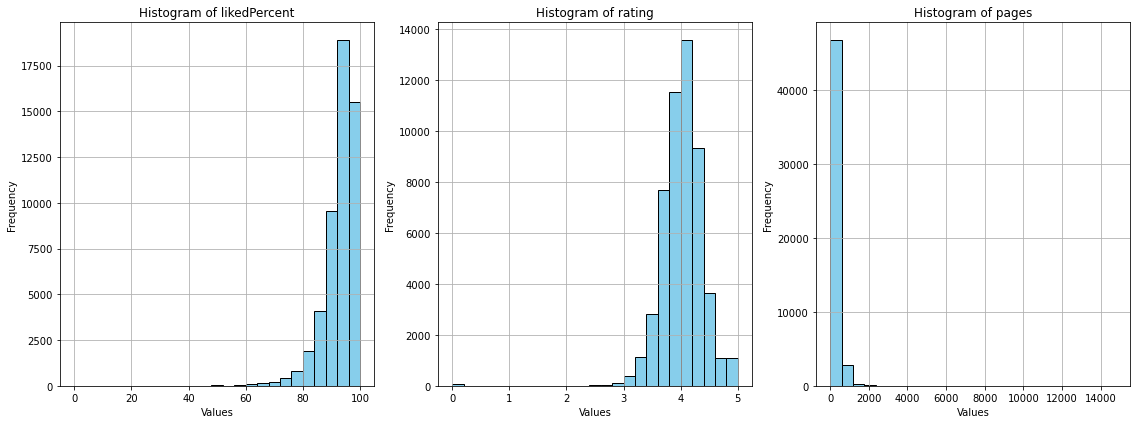

In [32]:
cols = ['likedPercent','rating','pages']
num_cols_count = len(cols)
fig, axes = plt.subplots(1, num_cols_count, figsize=(16, 6))
for i, col in enumerate(cols):
    min_val = numerical_df[col].min()
    max_val = numerical_df[col].max()
    axes[i].hist(numerical_df[col], bins=25, range=(min_val, max_val), color='skyblue', edgecolor='black')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [33]:
df.loc[numerical_df[numerical_df['pages'] > 2000].index,:'title']

,bookId,title
143,114345.The_Little_House_Collection,The Little House Collection
409,862041.Harry_Potter_Series_Box_Set,Harry Potter Series Box Set
1095,3579.The_Complete_Anne_of_Green_Gables_Boxed_Set,The Complete Anne of Green Gables Boxed Set
1592,18796.In_Search_of_Lost_Time,In Search of Lost Time
1679,12177850-a-song-of-ice-and-fire,A Song of Ice and Fire
...,...,...
46911,15041842-the-sandman-volumes-1-10,The Sandman Volumes 1-10
49197,21266675-the-complete-secret-seven-library,The Complete Secret Seven Library
50396,26870789-iron-fey,Iron Fey: The Iron King / Winter's Passage / T...
50744,18490595-zibaldone,Zibaldone


**Nhận xét**: 
- Hầu như tất cả các cuốn sách đều có phần trăm lượt thích hơn 60%, phần lớn những cuốn sách hơn 60% đều nằm trong khoảng 95-100%.
- Về phần đánh giá, các cuốn sách đều có rating khoảng 2.5 sao trở lên, hầu hết nằm ở 4 sao gồm gần 14000, các cuốn sách hay, đạt đánh giá cực tốt (5 sao), chiếm tỉ lệ khá thấp chỉ hơn 1000 cuốn sách trong khoảng hơn 50000.
- Các cuốn sách trung bình đều có số trang ít hơn 1000, có những cuốn sách dài tập > 2000 trang chẳng hạn như Harry Potter.

### 3.6.1 What is the percentage of missing values?

In [34]:
def missing_ratio(input):
    return (input.isnull().sum() / len(input) * 100).round(1)


df_describe = df.select_dtypes(include=np.number)
df_describe = df_describe.agg([missing_ratio])
df_describe

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,5_star,4_star,3_star,2_star,1_star
missing_ratio,0.0,4.5,0.0,1.2,0.0,0.0,2.7,2.7,2.7,2.7,2.7


Chỉ một phần nhỏ có missing value (< 30%) không ảnh hưởng nhiều tới số liệu ta cần phân tích.

### 3.6.2 Min? max? Are they abnormal?

In [35]:
df_describe = df.select_dtypes(include=np.number)
df_describe = df_describe.agg(["min", "max"])
df_describe

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,5_star,4_star,3_star,2_star,1_star
min,0.0,0.0,0,0.0,0,-4,0.0,0.0,0.0,0.0,0.0
max,5.0,14777.0,7048471,100.0,2993816,30516,4578137.0,1921313.0,1008686.0,542017.0,548674.0


Có vẻ như trong các cột dữ liệu dạng số, cột "bbeVotes" bất thường vì min của cột này là -4, trong khi cột này thể số phiếu bầu trong danh sách "Best Books Ever", nghĩa là luôn không âm. Các cột còn lại đều đúng và thỏa mãn.

In [36]:
#Fix "bbeVotes"
df.loc[df["bbeVotes"] < 0, "bbeVotes"] = 0

In [37]:
df_describe = df.select_dtypes(include=np.number)
df_describe = df_describe.agg(["min", "max"])
df_describe

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,5_star,4_star,3_star,2_star,1_star
min,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
max,5.0,14777.0,7048471,100.0,2993816,30516,4578137.0,1921313.0,1008686.0,542017.0,548674.0


## 3.7 With each categorical column, how are values distributed?

* Tìm số unique genres:

In [38]:
unique_genres = []
for sublist in df['genres']:
    for genre in sublist:
        if genre not in unique_genres:
            unique_genres.append(genre)
unique_genres.remove('')

### 3.7.1 What is the percentage of missing values?

In [39]:
df_describe = df.select_dtypes(exclude=np.number)
df_describe = df_describe.agg([missing_ratio])
df_describe

,bookId,title,series,author,description,language,isbn,genres,characters,bookFormat,edition,publisher,publishDate,firstPublishDate,awards,setting,coverImg,price
missing_ratio,0.0,0.0,55.3,0.0,2.5,7.2,0.0,0.0,0.0,2.8,90.6,7.0,13.0,42.6,0.0,0.0,1.2,27.4


edition, series có nhiều giá trị missing value (> 30%) ta nên drop cột đó.

In [40]:
df = df.drop(['edition'],axis=1)

In [41]:
df = df.drop(['series'],axis=1)

In [42]:
df_describe = df.select_dtypes(exclude=np.number)
df_describe = df_describe.agg([missing_ratio])
df_describe

,bookId,title,author,description,language,isbn,genres,characters,bookFormat,publisher,publishDate,firstPublishDate,awards,setting,coverImg,price
missing_ratio,0.0,0.0,0.0,2.5,7.2,0.0,0.0,0.0,2.8,7.0,13.0,42.6,0.0,0.0,1.2,27.4


### 3.7.2 How many different values? Show a few

In [43]:
cols = ['language','isbn','bookFormat','publisher']
for col in cols:
    print(df[col].value_counts())

language
English                                  42635
Arabic                                    1036
Spanish                                    684
French                                     576
German                                     525
                                         ...  
Aromanian; Arumanian; Macedo-Romanian        1
Basque                                       1
Faroese                                      1
Iranian (Other)                              1
Norwegian Nynorsk; Nynorsk, Norwegian        1
Name: count, Length: 81, dtype: int64
isbn
9999999999999    4350
9780312429980       2
9780515048742       2
9780765326355       2
9780446677844       2
                 ... 
9781563899294       1
9780976140733       1
9780446605151       1
9780316036184       1
9781599554976       1
Name: count, Length: 48072, dtype: int64
bookFormat
Paperback                26748
Hardcover                12257
Kindle Edition            5824
Mass Market Paperback     2566
ebook        

In [46]:
multi_answer_cols = ['author','genres','setting','awards','characters']
survey_df = df[multi_answer_cols]
count_unique = lambda x: len(x.explode().value_counts())
distribution = lambda x: dict(x.explode().value_counts())
multiple_cate_profile = survey_df.agg([count_unique,distribution])
multiple_cate_profile.index = ["num_diff_vals", "distribution"]
del multiple_cate_profile['setting']['distribution']['']
del multiple_cate_profile['awards']['distribution']['']
del multiple_cate_profile['characters']['distribution']['']

In [47]:
multiple_cate_profile

,author,genres,setting,awards,characters
num_diff_vals,33697,983,4186,15714,48614
distribution,"{'Stephen King ': 104, 'Nora Roberts ': 103, '...","{'Fiction': 31605, 'Romance': 15482, 'Fantasy'...","{'England': 1331, 'United States of America': ...",{'LovelyBooks Leserpreis Nominee for Allgemein...,"{'Bruce Wayne': 51, 'Eve Dallas': 49, 'Roarke'..."


C:\Users\LEGION\AppData\Local\Temp/ipykernel_18348/3847371799.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distribution = multiple_cate_profile.iloc[:,i * 3 + j][1]
C:\Users\LEGION\AppData\Local\Temp/ipykernel_18348/3847371799.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,j].set_xticklabels(keys, rotation=45, ha='right')


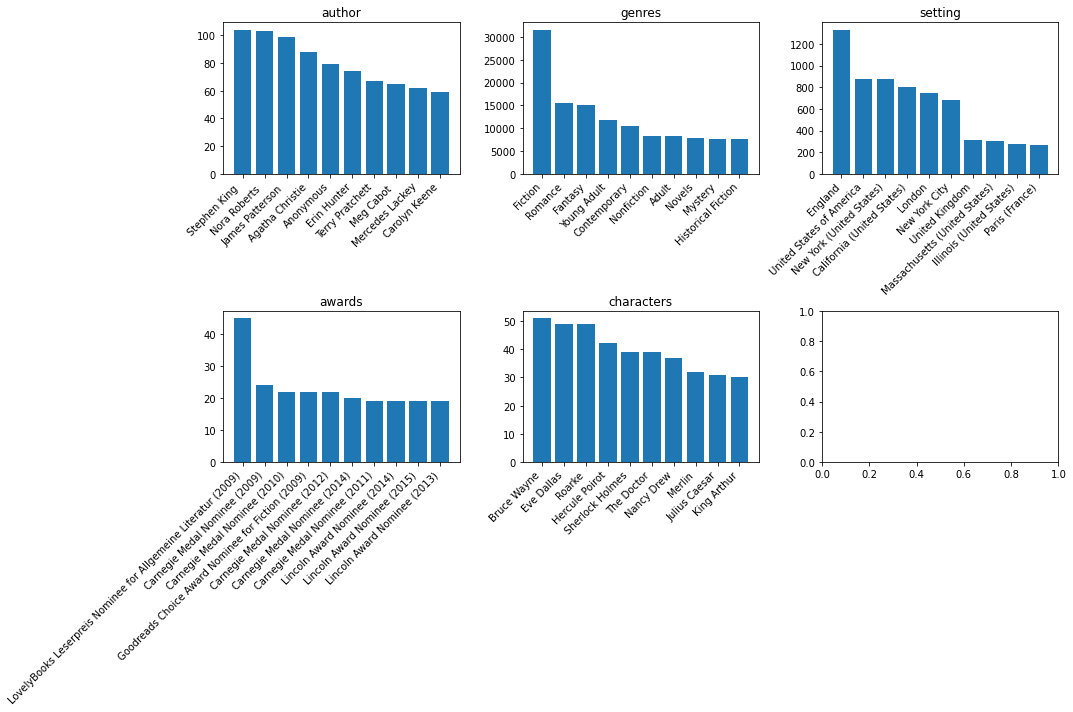

In [56]:
fig, ax = plt.subplots(2,3,figsize = (15,10))
for i in range(2):
    for j in range(3):
        if i * 3 + j < multiple_cate_profile.shape[1]:
            distribution = multiple_cate_profile.iloc[:,i * 3 + j][1]
            top_values = sorted(distribution.items(), key=lambda x: x[1], reverse=True)[:10]
            keys, values = zip(*top_values)
            ax[i,j].bar(keys, values)
            ax[i,j].set_xticklabels(keys, rotation=45, ha='right')
            ax[i,j].set_title(multiple_cate_profile.columns[i * 3 + j])
plt.tight_layout()
plt.show()

**Nhận xét**:
- Fiction, Romance là 2 thể loại chủ đề xuất hiện nhiều nhất trong kho tàng GoodReads. Các thể loại ít nổi hơn chẳng hạn như Fantasy, Young Adult, Contemporary cũng được nhiều tác giả viết.
- Hầu như các bối cảnh của truyện đều là ở Anh Quốc hoặc Hoa Kỳ, Pháp cũng là một nơi lý tưởng để phát triển bối cảnh câu chuyện.
- Các giải thưởng sách thường thấy nhất là LovelyBooks Leserpreis Nominee for Allgemeine Literatur (2009), chỉ gồm hơn 40 cuốn sách đạt được giải, nối tiếp là các giải thưởng khác ít sách đạt được hơn.

### 3.7.3 Are they abnormal?
Có những giá trị string null như "" trong cột setting và awards, điều này cho thấy cuốn sách đấy không có setting, hoặc không đạt được giải thưởng nào.

# 4. Asking meaningful questions

## 4.1 Question 1

**Question:** Những tác giả sẽ đạt được giải thưởng đề cử sách nhiều nhất?

**Benefits of finding the answer:** 
- Xếp loại văn phong, trình độ viết, mức độ nổi tiếng của các tác giả để có thể tìm đọc những cuốn sách hay ít nổi tiếng của những tác giả đó.

## 4.2 Question 2

**Question:** Xu hướng các thể loại sách được viết ra theo từng giai đoạn thay đổi như thế nào?

**Benefits of finding the answer:** 
- Hiểu rõ hơn về sự phát triển của văn hóa và xã hội.

## 4.3 Question 3

**Question:** Cách để xây dựng hệ thống khuyến nghị 10 cuốn sách dựa trên thể loại và ratings của một cuốn sách?

**Benefits of finding the answer:** 
- Giúp người đọc khám phá những cuốn sách mới vừa có nhiều điểm tương đồng so với cuốn sách mà người đó thích, vừa có ratings trung bình cao.
- Tăng trải nghiệm đọc sách

# 5. Preprocessing + analyzing data to answer each question

## 5.1 Question 1

### 5.1.1 Does it need to have preprocessing step, and if yes, how does your group preprocess?

**Text**

- Tạo một dataframe mới theo dataframe cũ.
- Tiếp theo loại bỏ các dòng không có giải thưởng.
- Explode cột author ra thành nhiều dòng.

**Code**

In [57]:
Q1_df = df.copy()
Q1_df = Q1_df[Q1_df['awards'].apply(lambda x: x != [''])]

In [58]:
Q1_df = Q1_df.explode('author').reset_index()

### 5.1.2 How does your group analyze data to answer the question?

**Text**
- Lấy ra hai cột cần sử dụng là author và awards.
- Groupby theo author rồi tính số lượng giải thưởng của từng author đó.
- Vẽ biểu đồ thể hiện 20 tác giả có số giải thưởng cao nhất.

**Code**

In [59]:
Q1_df = Q1_df[['author','awards']]

In [60]:
Q1_df = Q1_df.groupby('author')['awards'].count().reset_index()
Q1_df

,author,awards
0,A'Mera Frieman,1
1,A. Lee Martinez,1
2,A. Manette Ansay,1
3,A. Samad Said,1
4,A. Scott Berg,1
...,...,...
8170,芦奈野 ひとし,1
8171,苟利军,1
8172,貴志 祐介,1
8173,郭清玲,1


In [61]:
top_20_authors

NameError: name 'top_20_authors' is not defined

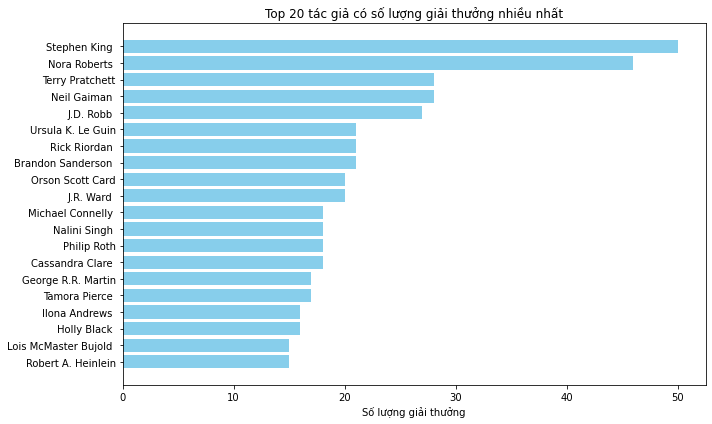

In [62]:
top_20_authors = Q1_df.sort_values(by='awards', ascending=False).head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_20_authors['author'], top_20_authors['awards'], color='skyblue')
plt.xlabel('Số lượng giải thưởng')
plt.title('Top 20 tác giả có số lượng giải thưởng nhiều nhất')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 5.2 Question 2

### 5.2.1 Does it need to have preprocessing step, and if yes, how does your group preprocess?

**Text**

- Đầu tiên ta tiến hành loại bỏ những giá trị Nan trong cột PublishDate và gắn vào DataFrame survey_df
- Tiếp theo sẽ tạo ra 1 columns mới với giá trị là Năm của "publishDate"
- Tiến hành sắp xếp data tăng dần theo số Năm
- Loại bỏ dòng đầu tiên vì đó giá trị của nó là []

**Code**

In [76]:
surver_df = df[df['publishDate'].notna()]
surver_df['publishDate_Year'] = surver_df['publishDate'].apply(lambda x: x.year)
surver_df = surver_df[['genres','publishDate_Year']].sort_values(by = 'publishDate_Year').iloc[1:,:]

C:\Users\LEGION\AppData\Local\Temp/ipykernel_18348/3414911773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surver_df['publishDate_Year'] = surver_df['publishDate'].apply(lambda x: x.year)


### 5.2.2 How does your group analyze data to answer the question?

**Text**

- Chọn ra 4 giai đoạn để so sánh là (1900,2000),(2000,2010),(2010,2015),(2015,2022)
- Với mỗi giai đoạn:
    - Vì mỗi phim chứa 1 list các thể loại nên em dùng explode để phân tách ra.
    - Dùng value_counts() để tìm ra số lần xuất của các thể loại đó và chọn ra top 5 có số lần xuất hiện nhiều nhất
    - Chia cho tổng số thể loại để lấy %
- Dùng for để duyệt qua 4 giai đoạn

**Code**

C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical

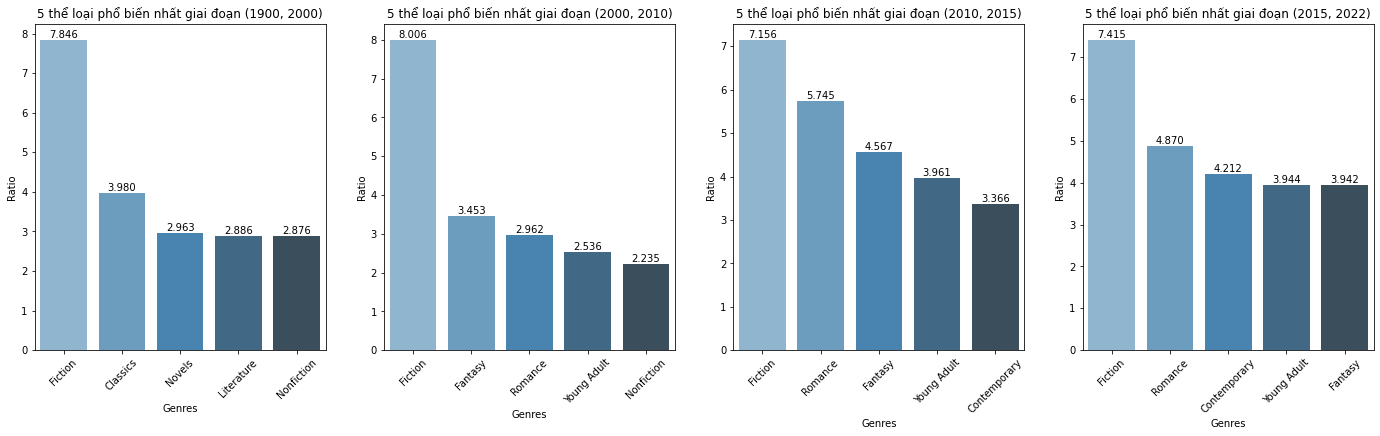

In [77]:
stages = [(1900,2000),(2000,2010),(2010,2015),(2015,2022)]
fig, ax = plt.subplots(1,4,figsize = (24,6))
for i, stage in enumerate(stages):
    survey_df_i = surver_df[(surver_df['publishDate_Year'] >= stage[0]) & (surver_df['publishDate_Year'] < stage[1])]
    length = len(survey_df_i.genres.explode())
    distribution = pd.DataFrame(survey_df_i.genres.explode().value_counts()[:5]/length*100).reset_index()
    distribution.columns = ['genres','ratio']
    sns.barplot(x='genres', y='ratio', data = distribution, ax = ax[i], palette='Blues_d')
    ax[i].bar_label(ax[i].containers[0], fmt='%1.3f', label_type='edge', fontsize=10)
    ax[i].set_title(f'5 thể loại phổ biến nhất giai đoạn {stage}')
    ax[i].set_xlabel('Genres')
    ax[i].set_ylabel('Ratio')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45)

- Ta có thể thấy thể loại Fiction luôn đứng đầu trong mọi giai đoạn
- Càng về sau, thể loại Romance dần vượt lên
- Sẽ thêm nhận xét sau.

## 5.3 Question 3

### 5.3.1 Does it need to have preprocessing step, and if yes, how does your group preprocess?

Để thực hiện câu hỏi này, ta cần thiết lập ma trận TF-IDF dựa trên các thể loại.<br>
Trước khi đi vào bước tiền xử lí dữ liệu, em sẽ giải thích định nghĩa về TF-IDF: là một thước đo thống kê đánh giá mức độ quan trọng của một từ với một tài liệu trong bộ sưu tập tài liệu.<br>
**Các bước:**
- Xây dựng ma trận với với số dòng tương ứng với số lượng sách và số cột tương ứng với số từ được tách ra từ "genres"
- Tính ma trận TF-IDF

Xây dựng ma trận với với số dòng tương ứng với số lượng sách và số cột tương ứng với số từ được tách ra từ "genres"

In [78]:
one_hot_df = pd.get_dummies(df['genres'].apply(pd.Series).stack()).groupby(level=0).sum()
one_hot_df.index = df['title'].values

Tính ma trận TF-IDF 

In [82]:
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(one_hot_df)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=one_hot_df.columns, index = one_hot_df.index)

NameError: name 'TfidfTransformer' is not defined

### 5.3.2 How does your group analyze data to answer the question?

- Em sẽ lọc ra những cuốn sách có ratings $\geq$ 4.5 để nâng cao chất lượng của hệ thống gợi ý.
- Em sử dụng độ tương tự cosine để tính toán một đại lượng số biểu thị sự giống nhau giữa tất cả cuốn sách với các cuốn sách có ratings $\geq$ 4.5

**Chú ý:** Tuy nhiên, vì lượng dữ liệu lớn nên việc lưu trữ và tính toán độ tương đồng giữa các cuốn sách cùng một lúc là không khả thi vì nó có thể dẫn đến các vấn đề về bộ nhớ. Cho nên em đề xuất một giải pháp là sử dụng batch_size, nghĩa là ở mỗi bước, ta sẽ tính toán độ tương đồng giữa các các cuốn sách trong batch_size với toàn bộ dataset và lưu trữ trên ma trận (batch_size,m)(Với m là số lượng sách có ratings lớn hơn 4.5).

**Khởi tạo batch_size = 128**

In [ ]:
batch_size = 256
start = 0
end = batch_size

**Lọc ra những cuốn sách có ratings $\geq$ 4.5**

In [ ]:
df_ratings = df[df['rating']>=4.5]
tfidf_ratings_df = tfidf_df[(df['rating']>=4.5).values]

**Tính toán cosine similarity**

In [ ]:
num_epoch = df.shape[0]//batch_size + 1
cosine_sim_dict = {}
for i in range(num_epoch):
    cosine_sim_df = cosine_similarity(tfidf_df[start:end], tfidf_ratings_df)
    cosine_sim_batch = pd.DataFrame(cosine_sim_df, index=one_hot_df.index[start:end], columns=tfidf_ratings_df.index)
    cosine_sim_dict[i] = cosine_sim_batch
    start += batch_size
    end += batch_size

**Xây dựng hệ thống gợi ý**

In [ ]:
def Content_based_RS(cosine_sim_dict, book_title,n):
    idx = df[df['title'] == book_title].index[0]
    i = idx // batch_size
    result = cosine_sim_dict[i][cosine_sim_dict[i].index == book_title].squeeze().nlargest(n)
    name, score = result.index, result.values
    return name, score

In [ ]:
book_title = 'Daughter of Helaman'
n = 5
name, score = Content_based_RS(cosine_sim_dict,'Daughter of Helaman',n)
top_n_book = pd.DataFrame([name,score], index = ['Title','Cosine Similarity']).transpose()

In [ ]:
top_n_book

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Cosine Similarity', y='Title', data=top_n_book, palette='Blues_d')
plt.title(f'Top {n} Books Similarity with {book_title}')
plt.xlabel('Cosine Similarity')
plt.ylabel('Book Title')
plt.show()

# 6. Reflection